In [2]:
#!pip install python-dotenv

In [3]:
#!pip install praw pandas

In [4]:
#import praw

# Replace with your actual credentials
#reddit = praw.Reddit(
  #  client_id="WjW5nZ4gVY04Y0fwzuUu2Q",       # from Reddit app page
  #  client_secret="SymzQnIxV-14dP_kve1oxHSnk0As7w",  # from Reddit app page
  #  user_agent="AI_bias_in__Workplace_Scraper",  # any name/description
#)


In [5]:
#print(reddit.read_only)  # should return True if connection is successful

In [6]:
# --- Enhanced Reddit Scraping for AI Ethics in Workplace ---

import pandas as pd
import time


# # --- Subreddits & Keywords ---
# subreddits = [
#     'artificial', 'MachineLearning', 'datascience', 'learnmachinelearning',
#     'technology', 'futurology', 'Business', 'Work', 'opensource'
# ]

# # Broader keywords to capture more posts
# keywords = [
#     'AI', 'artificial intelligence', 'automation', 'workplace', 
#     'employee', 'bias', 'ethics', 'HR', 'hiring', 'monitoring'
# ]

# posts_data = []

# for sub in subreddits:
#     try:
#         subreddit = reddit.subreddit(sub)
#         print(f"Collecting posts from r/{sub}...")
        
#         # Fetch up to 500 latest posts per subreddit
#         for post in subreddit.new(limit=500):
#             post_text = f"{post.title} {post.selftext}".lower()
#             if any(keyword.lower() in post_text for keyword in keywords):
#                 posts_data.append({
#                     'subreddit': sub,
#                     'title': post.title,
#                     'score': post.score,
#                     'num_comments': post.num_comments,
#                     'url': post.url,
#                     'created_utc': post.created_utc,
#                     'selftext': post.selftext
#                 })
#         time.sleep(2)  # gentle delay to respect Reddit's rate limits
#     except Exception as e:
#         print(f"Skipping r/{sub} due to error: {e}")

# # --- Save to CSV ---
# reddit_df = pd.DataFrame(posts_data)
# reddit_df.to_csv("reddit_ai_ethics_workplace_full.csv", index=False)
# print(f"Collected {len(reddit_df)} posts. Saved to reddit_ai_ethics_workplace_full.csv")


In [7]:
 df = pd.read_csv("reddit_ai_ethics_workplace_full.csv")

In [8]:
print(df.head())
print(df.info())
print(df['subreddit'].value_counts())

    subreddit                                              title  score  \
0  artificial         Do You Monitor Chunk Drift Across Formats?      0   
1  artificial  An AI model trained on prison phone calls now ...      2   
2  artificial  Bank of America predicts an 'air pocket,' not ...     42   
3  artificial                  For those who want Adult Mode....      0   
4  artificial  Micron stops selling memory to consumers as de...     38   

   num_comments                                                url  \
0             0  https://www.reddit.com/r/artificial/comments/1...   
1             1  https://www.technologyreview.com/2025/12/01/11...   
2            17  https://fortune.com/2025/12/03/is-ai-a-bubble-...   
3             1  https://www.reddit.com/r/artificial/comments/1...   
4            10  https://www.cnbc.com/2025/12/03/micron-stops-s...   

    created_utc                                           selftext  
0  1.764805e+09  Chunking is one of the most repetitive par

In [9]:
import re

# Combine title + selftext into one column
df['text'] = df['title'] + " " + df['selftext'].fillna("")

# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # remove non-letter characters
    text = re.sub(r"\s+", " ", text)  # remove extra spaces
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Check first 5 cleaned rows
df[['title', 'selftext', 'clean_text']].head()


,title,selftext,clean_text
0,Do You Monitor Chunk Drift Across Formats?,Chunking is one of the most repetitive parts o...,do you monitor chunk drift across formats chun...
1,An AI model trained on prison phone calls now ...,NaN,an ai model trained on prison phone calls now ...
2,"Bank of America predicts an 'air pocket,' not ...",NaN,bank of america predicts an air pocket not an ...
3,For those who want Adult Mode....,Use this site: spicychat.ai\nIf you really wan...,for those who want adult mode use this site sp...
4,Micron stops selling memory to consumers as de...,NaN,micron stops selling memory to consumers as de...


In [10]:
from collections import Counter

# Split all text into words
all_words = " ".join(df['clean_text']).split()

# Count word frequency
word_freq = Counter(all_words)

# Get 20 most common words
common_words = word_freq.most_common(20)
print(common_words)


[('the', 14067), ('to', 11767), ('and', 11013), ('a', 9781), ('i', 9302), ('of', 6107), ('for', 5467), ('in', 5387), ('is', 5052), ('it', 4404), ('that', 4151), ('this', 3441), ('with', 3424), ('on', 3340), ('my', 3311), ('you', 2822), ('or', 2808), ('but', 2548), ('ai', 2486), ('are', 2151)]


[nltk_data] Downloading package stopwords to /Users/nidhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word cloud saved successfully!


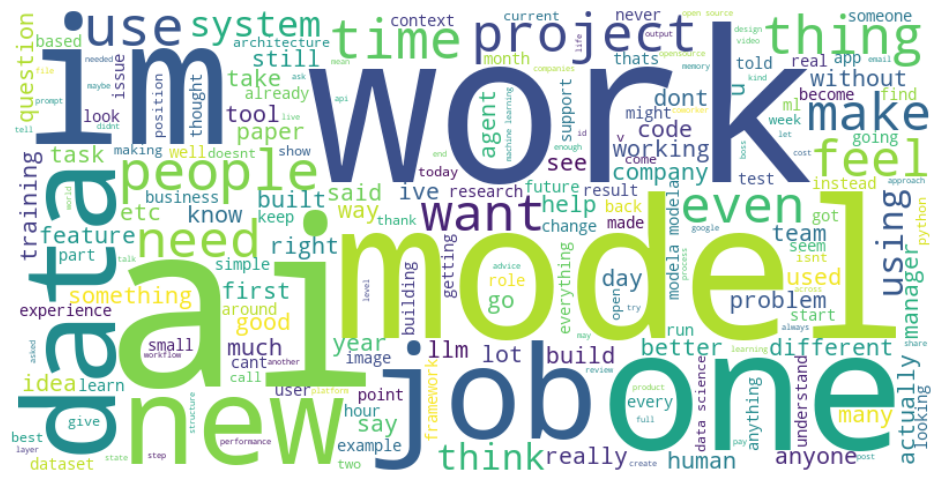

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['clean_text_nostop'] = df['clean_text'].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['clean_text_nostop']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the word cloud as a PNG file
wordcloud.to_file("reddit_ai_workplace_wordcloud.png")
print("Word cloud saved successfully!")

plt.show()


In [12]:
# Split all text into words
all_words = " ".join(df['clean_text_nostop']).split()

# Count word frequency
word_freq = Counter(all_words)

# Get 20 most common words
common_words = word_freq.most_common(20)
print(common_words)

[('ai', 2486), ('im', 1951), ('like', 1644), ('data', 1430), ('work', 1343), ('would', 1151), ('one', 940), ('model', 897), ('time', 863), ('get', 836), ('dont', 811), ('job', 808), ('new', 805), ('ive', 771), ('models', 763), ('want', 744), ('people', 723), ('use', 700), ('even', 693), ('also', 687)]


In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (first time only)
#nltk.download('vader_lexicon')


In [14]:

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df['sentiment'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert compound score → label
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)

df[['clean_text', 'sentiment', 'sentiment_label']].head()


,clean_text,sentiment,sentiment_label
0,do you monitor chunk drift across formats chun...,-0.4848,Negative
1,an ai model trained on prison phone calls now ...,-0.5106,Negative
2,bank of america predicts an air pocket not an ...,-0.3612,Negative
3,for those who want adult mode use this site sp...,0.8817,Positive
4,micron stops selling memory to consumers as de...,-0.2732,Negative


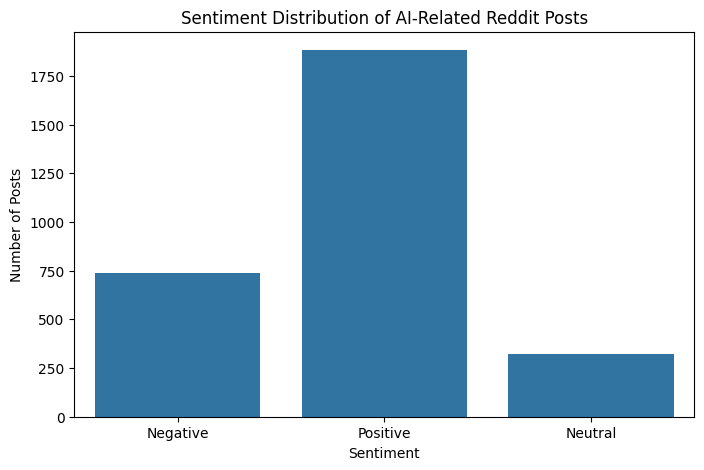

In [15]:
#Sentiment Distribution Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_label', data=df)
plt.title("Sentiment Distribution of AI-Related Reddit Posts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")

plt.savefig("Sentiment_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()


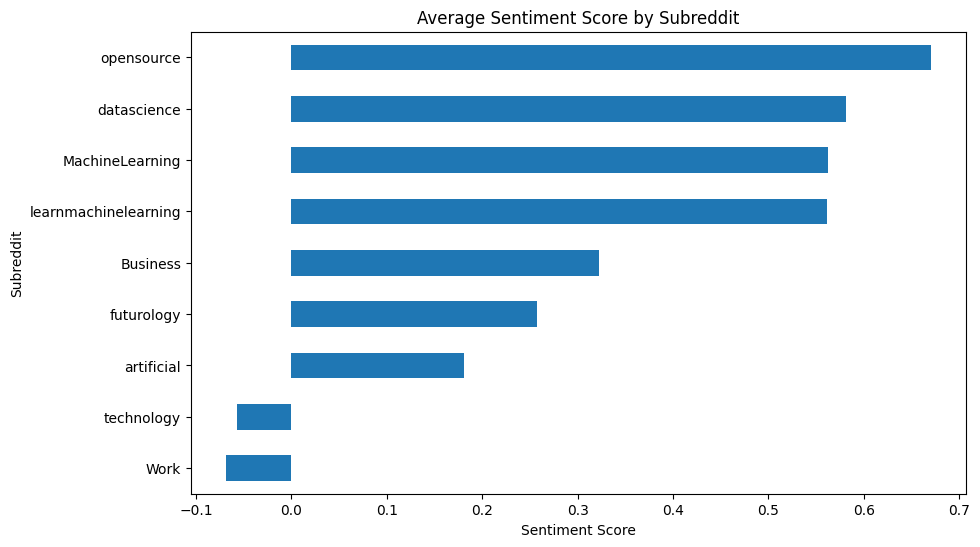

In [16]:
#Average Sentiment by Subreddit

sent_by_sub = df.groupby('subreddit')['sentiment'].mean().sort_values()

plt.figure(figsize=(10,6))
sent_by_sub.plot(kind='barh')
plt.title("Average Sentiment Score by Subreddit")
plt.xlabel("Sentiment Score")
plt.ylabel("Subreddit")

plt.savefig("AverageSentiment.png", dpi=300, bbox_inches='tight')
plt.show()


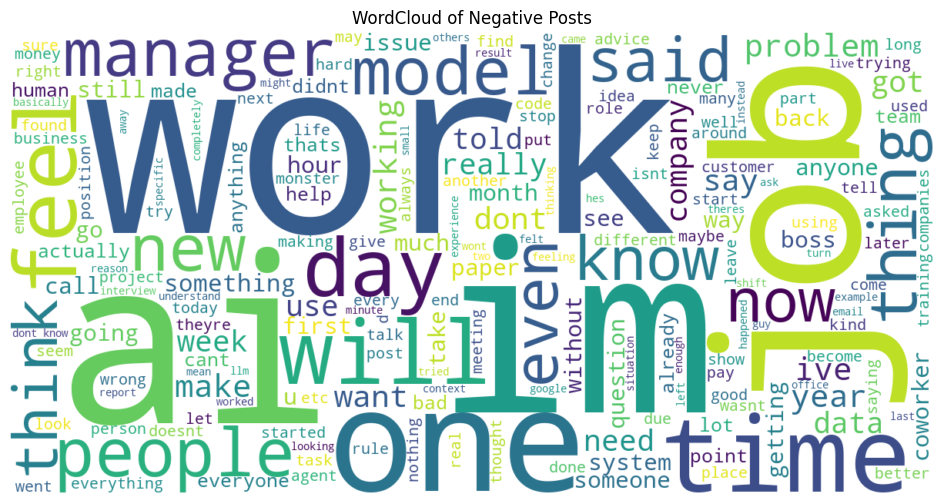

In [17]:
#Wordcloud for Negative Posts

neg_text = " ".join(df[df['sentiment_label']=='Negative']['clean_text'])

wc_neg = WordCloud(width=1200, height=600, background_color='white').generate(neg_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Negative Posts")

plt.savefig("Negative_PostsCloud.png", dpi=300, bbox_inches='tight')
plt.show()


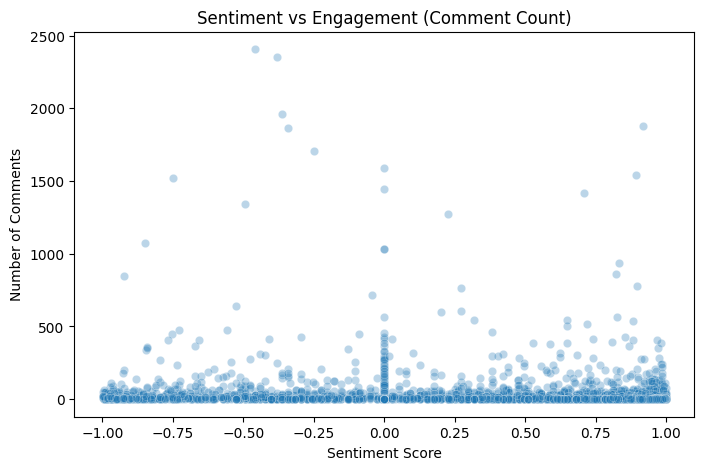

In [18]:
#Sentiment vs Number of Comments
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='sentiment', y='num_comments', alpha=0.3)
plt.title("Sentiment vs Engagement (Comment Count)")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")

plt.savefig("SentimentvsComments.png", dpi=300, bbox_inches='tight')
plt.show()


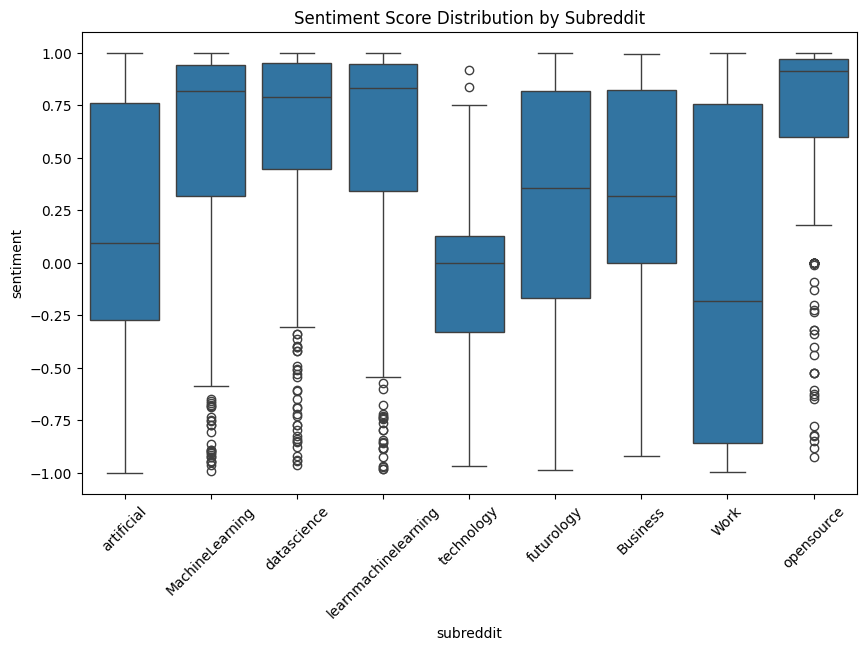

In [19]:
#Subreddit-Level Sentiment Comparison
plt.figure(figsize=(10,6))
sns.boxplot(x='subreddit', y='sentiment', data=df)
plt.xticks(rotation=45)
plt.title("Sentiment Score Distribution by Subreddit")
plt.show()


In [20]:
keywords = ["job", "work", "automation", "hiring", "layoff"]

for word in keywords:
    subset = df[df['clean_text'].str.contains(word)]
    print(word, subset['sentiment_label'].value_counts())
    print("-"*40)


job sentiment_label
Positive    292
Negative    187
Neutral      14
Name: count, dtype: int64
----------------------------------------
work sentiment_label
Positive    905
Negative    301
Neutral      42
Name: count, dtype: int64
----------------------------------------
automation sentiment_label
Positive    59
Negative     6
Neutral      1
Name: count, dtype: int64
----------------------------------------
hiring sentiment_label
Positive    56
Negative     8
Neutral      4
Name: count, dtype: int64
----------------------------------------
layoff sentiment_label
Positive    9
Negative    2
Name: count, dtype: int64
----------------------------------------


In [21]:
# Identify Hiring-Related Posts
# --------------------------
hiring_keywords = [
    "hire", "hiring", "recruit", "recruiting", "recruiter",
    "job", "resume", "applicant", "candidate", "application",
    "interview", "screening", "assessment", "workplace",
    "employee evaluation", "performance review"
]

df["is_hiring_post"] = df["clean_text"].apply(
    lambda x: any(keyword in x for keyword in hiring_keywords)
)

# --------------------------
# Create Subsets
# --------------------------
df_hire = df[df["is_hiring_post"]].copy()
df_nonhire = df[~df["is_hiring_post"]].copy()

print("Total posts:", len(df))
print("Hiring-related posts:", len(df_hire))
print("Non-hiring posts:", len(df_nonhire))

# --------------------------
# Sentiment Analysis
# --------------------------
sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

# --------------------------
# Sentiment Distribution Plot
# --------------------------
plt.figure(figsize=(8,4))
df["sentiment_label"].value_counts().plot(kind="bar")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Sentiment_Distribution.png")
plt.close()

# --------------------------
# Compare Mean Sentiment (Hiring vs Non-Hiring)
# --------------------------
mean_hire = df_hire["sentiment"].mean()
mean_nonhire = df_nonhire["sentiment"].mean()

print("Mean sentiment (hiring):", mean_hire)
print("Mean sentiment (non-hiring):", mean_nonhire)

# Save subsets for next steps
df_hire.to_csv("hiring_posts_cleaned.csv", index=False)
df_nonhire.to_csv("non_hiring_posts_cleaned.csv", index=False)
df.to_csv("all_posts_cleaned.csv", index=False)

print("\nFiles saved:")
print("- hiring_posts_cleaned.csv")
print("- non_hiring_posts_cleaned.csv")
print("- all_posts_cleaned.csv")

Total posts: 2942
Hiring-related posts: 728
Non-hiring posts: 2214
Mean sentiment (hiring): 0.3113585164835165
Mean sentiment (non-hiring): 0.3392135501355013

Files saved:
- hiring_posts_cleaned.csv
- non_hiring_posts_cleaned.csv
- all_posts_cleaned.csv


In [22]:
import matplotlib.pyplot as plt

# Ethical keywords
ethical_keywords = {
    "bias": ["bias", "biased", "unfair", "discriminate", "discrimination"],
    "fairness": ["fair", "fairness", "equity"],
    "transparency": ["transparent", "transparency", "explain"],
    "privacy": ["privacy", "surveillance", "monitoring"],
    "accountability": ["accountability", "responsible", "responsibility"]
}

def count_keywords(text, keywords):
    return sum(word in text for word in keywords)

# Count ethical concerns for each category
ethical_counts = {}

for category, keywords in ethical_keywords.items():
    ethical_counts[category] = {
        "hiring": df_hire["clean_text"].apply(lambda x: count_keywords(x, keywords)).sum(),
        "non_hiring": df_nonhire["clean_text"].apply(lambda x: count_keywords(x, keywords)).sum()
    }

ethical_df = pd.DataFrame(ethical_counts).T
ethical_df.columns = ["Hiring", "Non-Hiring"]
print(ethical_df)

# Plot & save
plt.figure(figsize=(8,5))
ethical_df.plot(kind="bar")
plt.title("Ethical Concerns in AI Discussions (Hiring vs. Non-Hiring)")
plt.ylabel("Keyword Mentions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("Ethical_Keyword_Frequencies.png")
plt.close()


                Hiring  Non-Hiring
bias                30          47
fairness            37          55
transparency        49         115
privacy             14          67
accountability      20          37


<Figure size 800x500 with 0 Axes>

In [23]:
#Sentiment of Ethical Concern Categories

# create a function to label categories
def has_keyword(text, keywords):
    return any(word in text for word in keywords)

results = {}

for category, keywords in ethical_keywords.items():
    df_cat = df[df['clean_text'].apply(lambda x: has_keyword(x, keywords))]
    df_noncat = df[~df['clean_text'].apply(lambda x: has_keyword(x, keywords))]

    results[category] = {
        "count": len(df_cat),
        "mean_sentiment_with_keyword": df_cat["sentiment"].mean(),
        "mean_sentiment_without_keyword": df_noncat["sentiment"].mean()
    }

results_df = pd.DataFrame(results).T
print(results_df)


                count  mean_sentiment_with_keyword  \
bias             67.0                     0.328685   
fairness         85.0                     0.450916   
transparency    155.0                     0.384154   
privacy          74.0                     0.546384   
accountability   55.0                     0.133562   

                mean_sentiment_without_keyword  
bias                                  0.332406  
fairness                              0.328792  
transparency                          0.329438  
privacy                               0.326798  
accountability                        0.336107  


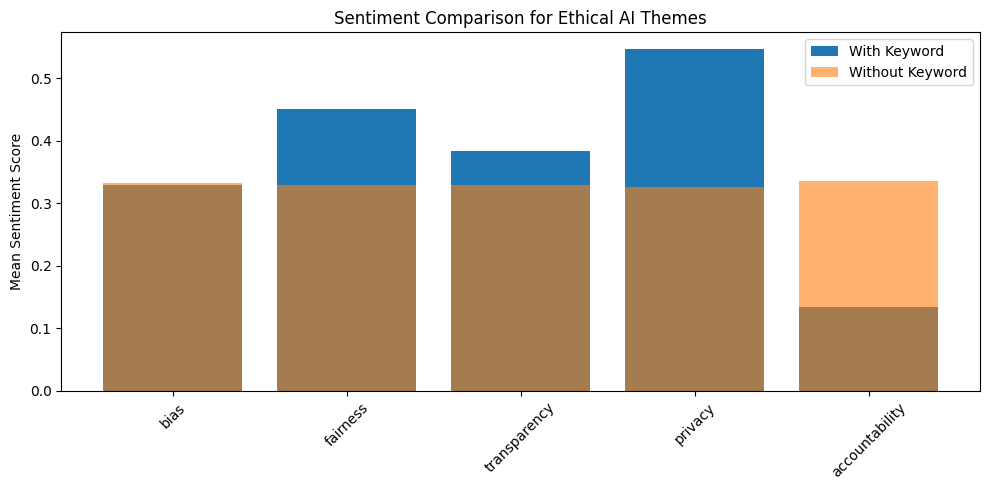

In [24]:
#Sentiment Difference Plot

plt.figure(figsize=(10,5))
plt.bar(results_df.index, results_df['mean_sentiment_with_keyword'], label="With Keyword")
plt.bar(results_df.index, results_df['mean_sentiment_without_keyword'], alpha=0.6, label="Without Keyword")
plt.xticks(rotation=45)
plt.ylabel("Mean Sentiment Score")
plt.title("Sentiment Comparison for Ethical AI Themes")
plt.legend()
plt.tight_layout()
plt.savefig("Ethical_Sentiment_Comparison.png", dpi=300)
plt.show()


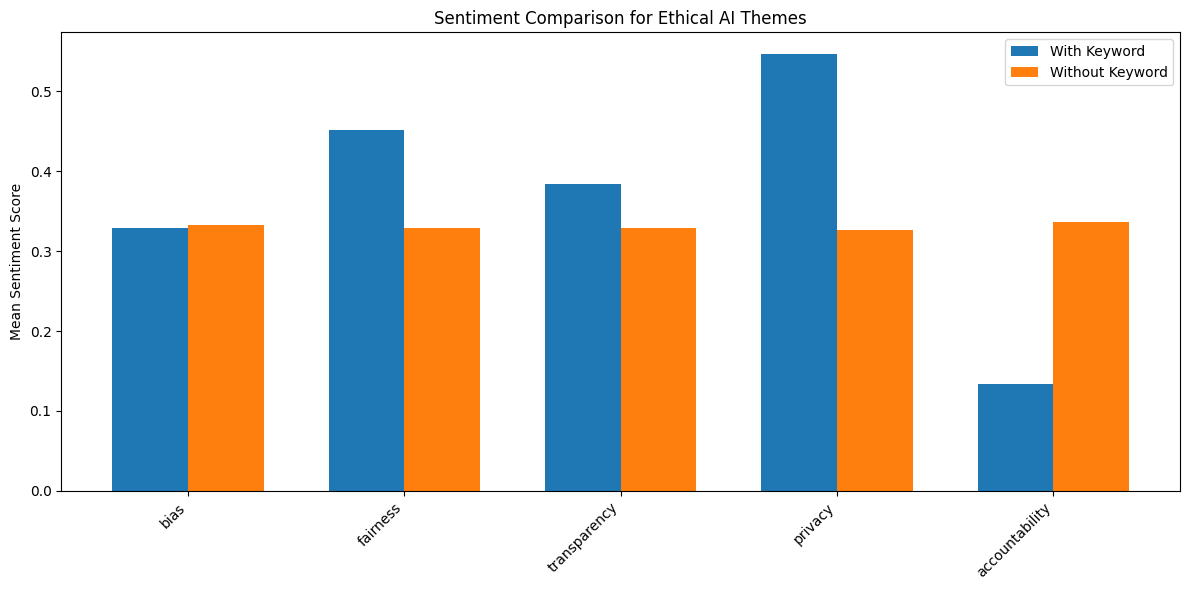

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# If your dataframe is results_df
themes = results_df.index
with_kw = results_df['mean_sentiment_with_keyword']
without_kw = results_df['mean_sentiment_without_keyword']

x = np.arange(len(themes))  # bar positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
plt.bar(x - width/2, with_kw, width, label="With Keyword", color="#1f77b4")
plt.bar(x + width/2, without_kw, width, label="Without Keyword", color="#ff7f0e")

plt.xticks(x, themes, rotation=45, ha='right')
plt.ylabel("Mean Sentiment Score")
plt.title("Sentiment Comparison for Ethical AI Themes")
plt.legend()
plt.tight_layout()
plt.savefig("Ethical_Sentiment_Comparison1.png", dpi=300)
plt.show()


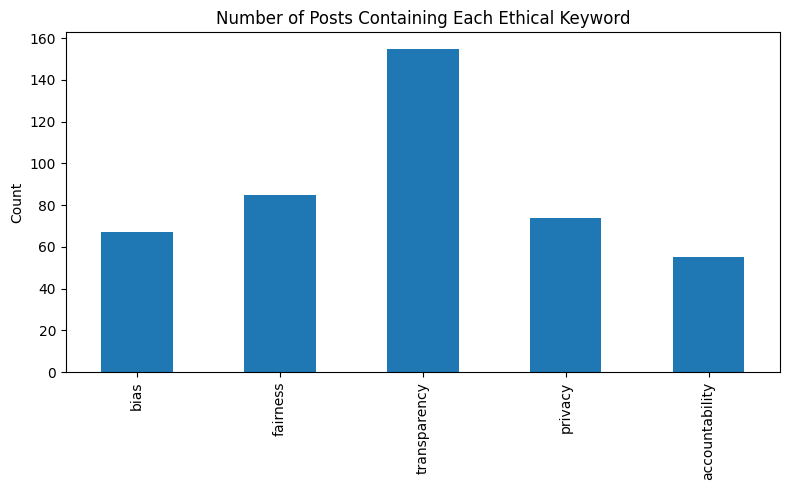

In [26]:
#Keyword Count Plot (Improved)
keyword_counts = results_df['count']
plt.figure(figsize=(8,5))
keyword_counts.plot(kind='bar')
plt.title("Number of Posts Containing Each Ethical Keyword")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Ethical_Keyword_Counts.png", dpi=300)
plt.show()


/var/folders/fv/lzcypv897lq16q7xg0v131x80000gn/T/ipykernel_5111/893446322.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hire['sentiment'], shade=True, label='Hiring Posts', linewidth=2)
/var/folders/fv/lzcypv897lq16q7xg0v131x80000gn/T/ipykernel_5111/893446322.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_nonhire['sentiment'], shade=True, label='Non-Hiring Posts', linewidth=2)


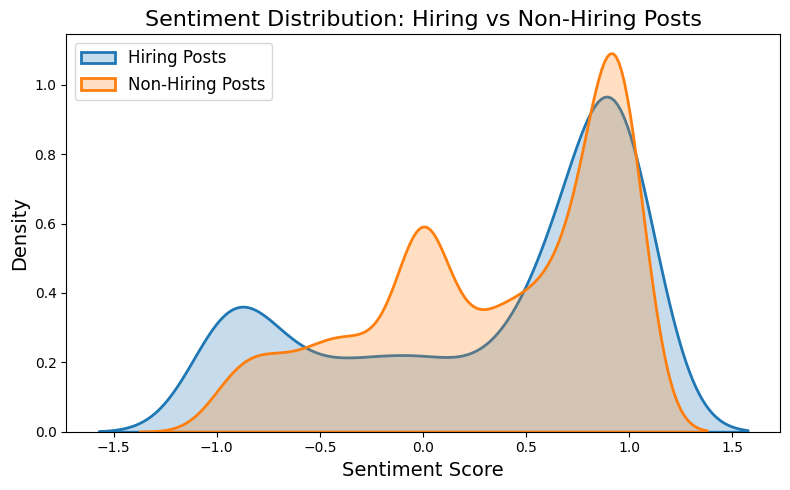

In [27]:


plt.figure(figsize=(8,5))

sns.kdeplot(df_hire['sentiment'], shade=True, label='Hiring Posts', linewidth=2)
sns.kdeplot(df_nonhire['sentiment'], shade=True, label='Non-Hiring Posts', linewidth=2)

plt.title("Sentiment Distribution: Hiring vs Non-Hiring Posts", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("Sentiment_Distribution_Hire_vs_Nonhire.png", dpi=300)
plt.show()


[('the', 5401), ('i', 5124), ('to', 5047), ('and', 4768), ('a', 4077), ('of', 2429), ('in', 2274), ('for', 2188), ('my', 1985), ('is', 1968), ('that', 1759), ('it', 1701), ('this', 1501), ('with', 1372), ('but', 1211), ('on', 1190), ('me', 1141), ('have', 1039), ('was', 1024), ('or', 1018)]


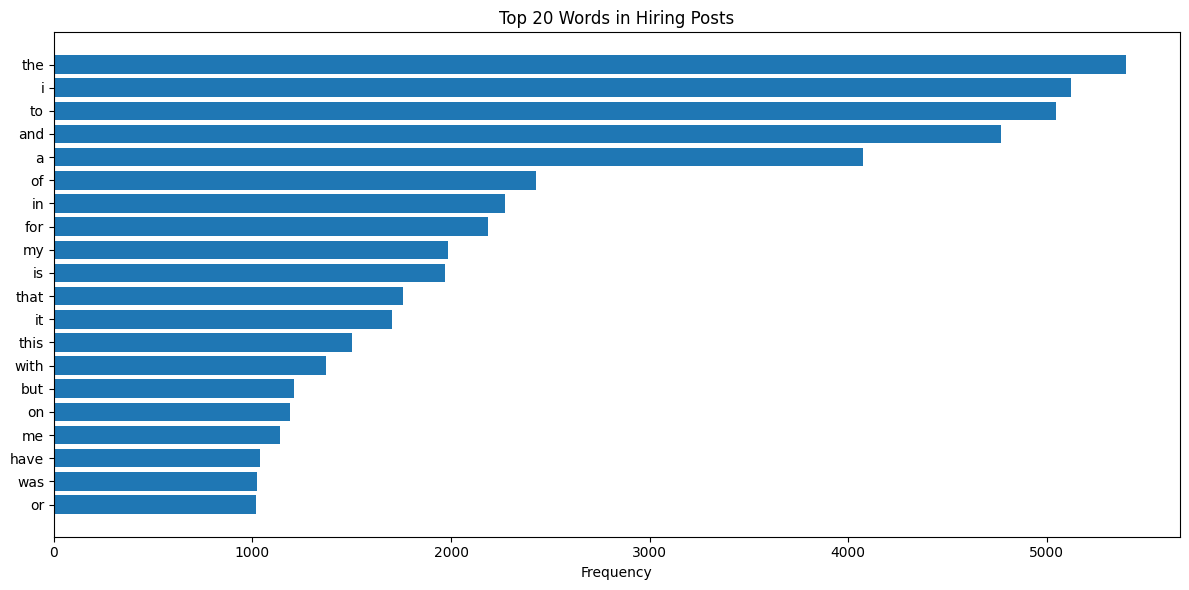

[('the', 8666), ('to', 6720), ('and', 6245), ('a', 5704), ('i', 4178), ('of', 3678), ('for', 3279), ('in', 3113), ('is', 3084), ('it', 2703), ('that', 2392), ('on', 2150), ('with', 2052), ('this', 1940), ('ai', 1910), ('you', 1859), ('or', 1790), ('are', 1364), ('but', 1337), ('my', 1326)]


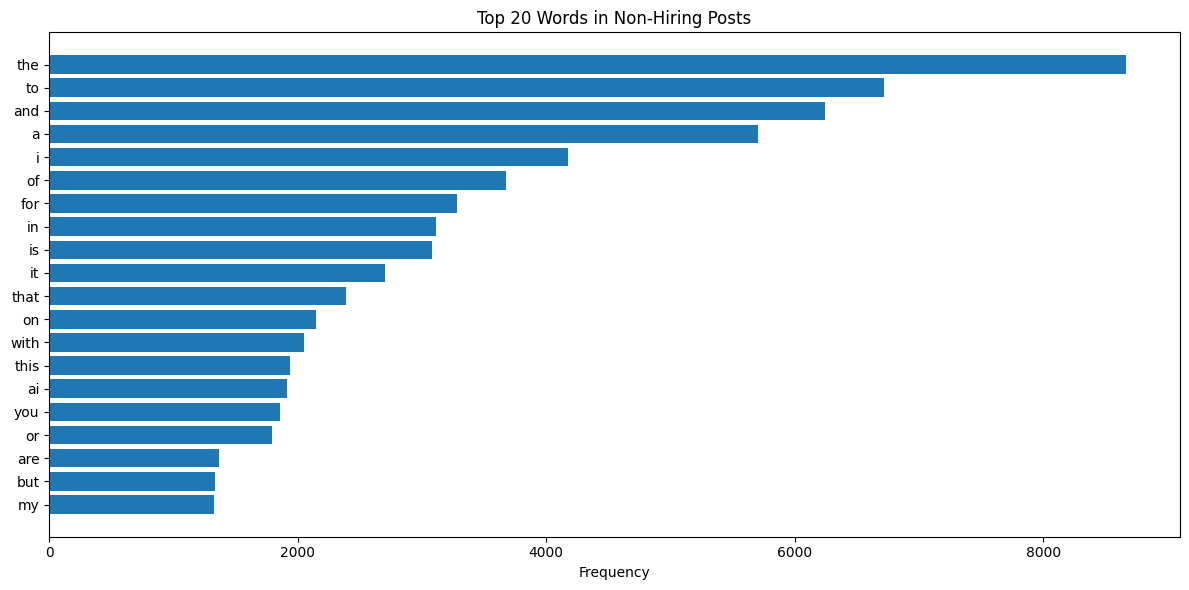

In [28]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words(df, title, filename):
    all_words = " ".join(df['clean_text']).split()
    counts = Counter(all_words)
    top20 = counts.most_common(20)

    words, freqs = zip(*top20)

    print(top20)

    plt.figure(figsize=(12,6))
    plt.barh(words, freqs)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_top_words(df_hire, "Top 20 Words in Hiring Posts", "TopWords_Hiring.png")
plot_top_words(df_nonhire, "Top 20 Words in Non-Hiring Posts", "TopWords_NonHiring.png")


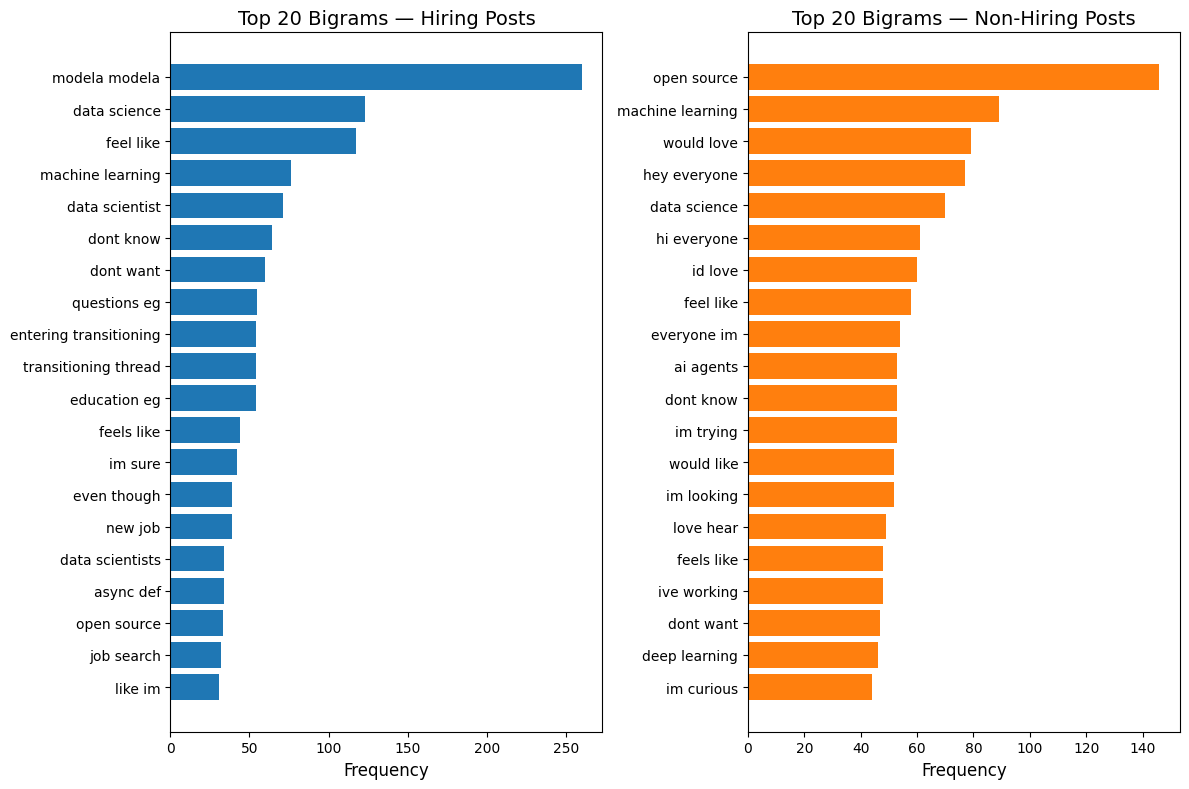

In [31]:
# 1C Bigram Comparison
import nltk
from nltk.util import ngrams

def get_bigrams(series, top_n=20):
    counter = Counter()
    for text in series.dropna().astype(str):
        # simple cleaning - keep consistent with previous cleaning
        tokens = [w for w in re.findall(r"\b\w+\b", text.lower()) if w not in stop_words and len(w)>1]
        bigrams = ngrams(tokens, 2)
        counter.update([" ".join(bg) for bg in bigrams])
    return counter.most_common(top_n)

# compute top bigrams
top_bigrams_hire = get_bigrams(df_hire['clean_text'], top_n=20)
top_bigrams_non = get_bigrams(df_nonhire['clean_text'], top_n=20)

# Convert to DataFrame for plotting
df_hb = pd.DataFrame(top_bigrams_hire, columns=['bigram','count'])
df_nhb = pd.DataFrame(top_bigrams_non, columns=['bigram','count'])

# Plotting side-by-side horizontal bar charts
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.barh(df_hb['bigram'][::-1], df_hb['count'][::-1], color='#1f77b4')
plt.title('Top 20 Bigrams — Hiring Posts', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.tight_layout()

plt.subplot(1,2,2)
plt.barh(df_nhb['bigram'][::-1], df_nhb['count'][::-1], color='#ff7f0e')
plt.title('Top 20 Bigrams — Non-Hiring Posts', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.tight_layout()

plt.savefig('TopBigrams_Hire_vs_Nonhire.png', dpi=300, bbox_inches='tight')
plt.show()


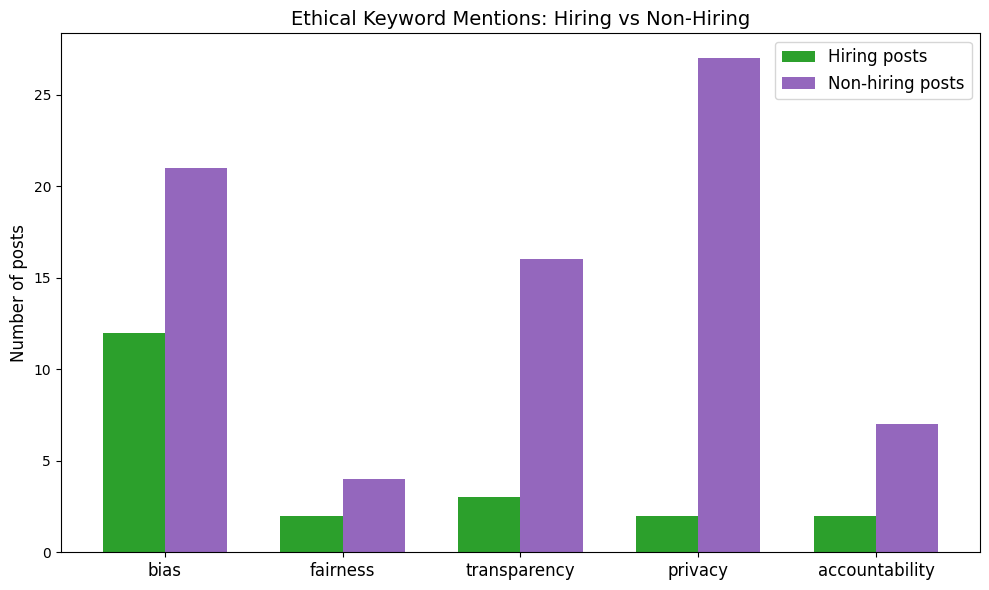

In [33]:
# 1D Ethical Theme Frequency Differences
import numpy as np
import matplotlib.pyplot as plt

keywords = ['bias','fairness','transparency','privacy','accountability']

def count_keyword_mentions(df, keywords):
    counts = {}
    for kw in keywords:
        # count posts that contain the exact keyword (word boundary)
        counts[kw] = df['clean_text'].str.contains(rf'\b{kw}\b', case=False, na=False).sum()
    return counts

counts_hire = count_keyword_mentions(df_hire, keywords)
counts_non = count_keyword_mentions(df_nonhire, keywords)

# prepare for plotting
labels = keywords
hire_vals = [counts_hire[k] for k in labels]
non_vals = [counts_non[k] for k in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, hire_vals, width, label='Hiring posts', color='#2ca02c')
plt.bar(x + width/2, non_vals, width, label='Non-hiring posts', color='#9467bd')
plt.xticks(x, labels, fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.title('Ethical Keyword Mentions: Hiring vs Non-Hiring', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Ethical_Keyword_Freq_Hire_vs_Nonhire.png', dpi=300, bbox_inches='tight')
plt.show()


In [35]:
# 1E Topic Modeling with gensim (LDA)
import gensim
from gensim import corpora
from gensim.models import LdaModel
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# choose number of topics
num_topics = 5

def prepare_corpus(text_series):
    # basic tokenization consistent with earlier cleaning
    texts = []
    for doc in text_series.dropna().astype(str):
        tokens = [w for w in re.findall(r"\b\w+\b", doc.lower()) if w not in stop_words and len(w)>2]
        texts.append(tokens)
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=5, no_above=0.5)  # remove very rare and very common tokens
    corpus = [dictionary.doc2bow(text) for text in texts]
    return texts, dictionary, corpus

# Prepare corpora
texts_hire, dict_hire, corpus_hire = prepare_corpus(df_hire['clean_text'])
texts_non, dict_non, corpus_non = prepare_corpus(df_nonhire['clean_text'])

# Train LDA models
lda_hire = LdaModel(corpus=corpus_hire, id2word=dict_hire, num_topics=num_topics, random_state=42, passes=10, chunksize=200)
lda_non = LdaModel(corpus=corpus_non, id2word=dict_non, num_topics=num_topics, random_state=42, passes=10, chunksize=200)

# Print topics
def print_topics(lda_model, dictionary, label):
    print(f"\nTop topics for {label}:")
    for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        words = ", ".join([w for w, _ in topic])
        print(f"Topic {i+1}: {words}")

print_topics(lda_hire, dict_hire, 'Hiring Posts')
print_topics(lda_non, dict_non, 'Non-Hiring Posts')

# Optionally save topics to CSV for inspection
def save_topics(lda_model, filename):
    rows = []
    for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        words = [w for w, _ in topic]
        rows.append((i+1, " ".join(words)))
    pd.DataFrame(rows, columns=['topic','top_words']).to_csv(filename, index=False)

save_topics(lda_hire, 'LDA_Topics_Hiring.csv')
save_topics(lda_non, 'LDA_Topics_NonHiring.csv')

# OPTIONAL: if you want pyLDAvis (interactive)
# !pip install pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# vis = gensimvis.prepare(lda_hire, corpus_hire, dict_hire)
# pyLDAvis.save_html(vis, 'lda_hire_vis.html')



Top topics for Hiring Posts:
Topic 1: questions, thread, transitioning, education, answers, weekly, resources, search, entering, resumes
Topic 2: session, jobs, hiring, remote, connection, new, medical, human, looking, robots
Topic 3: work, like, dont, one, get, time, would, ive, know, manager
Topic 4: company, data, role, year, companies, jobs, current, ceo, terms, machine
Topic 5: data, use, like, project, async, learning, would, projects, work, model

Top topics for Non-Hiring Posts:
Topic 1: get, search, reactive, analytics, find, also, async, storage, api, style
Topic 2: open, source, opensource, github, project, code, app, feedback, looking, new
Topic 3: state, count, events, effects, function, parameter, framework, logic, functions, graph
Topic 4: model, models, learning, training, human, system, systems, would, data, llm
Topic 5: like, people, work, would, dont, know, one, get, think, want


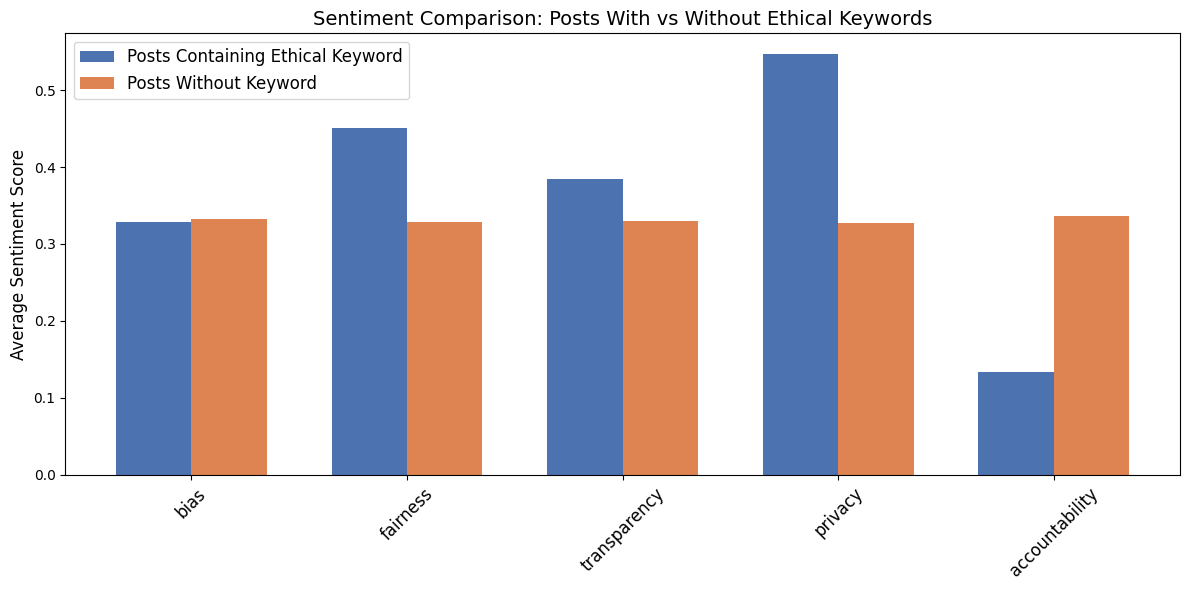

In [37]:
# Step 2 — Fixed Ethical Sentiment Comparison Chart



# Define labels and values
labels = results_df.index.tolist()
with_vals = results_df['mean_sentiment_with_keyword'].tolist()
without_vals = results_df['mean_sentiment_without_keyword'].tolist()

# Plot settings
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))

# Bars
plt.bar(x - width/2, with_vals, width, label="Posts Containing Ethical Keyword", color="#4C72B0")
plt.bar(x + width/2, without_vals, width, label="Posts Without Keyword", color="#DD8452")

# Labels
plt.xticks(x, labels, rotation=45, fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.title("Sentiment Comparison: Posts With vs Without Ethical Keywords", fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig("Ethical_Sentiment_Comparison_FIXED.png", dpi=300)
plt.show()
